# <span style = "color:blue">Lab 5 Exercise</span>
<div class = "alert alert-danger">
Name your file after your student (matric) number, for example, A1234567B_Lab5Ex.ipynb

Please let the lab facilitator check your work and mark your attendance before leaving the lab.
</div>

# <span style = "color:blue">Question 1:</span>

Given the csv file SocialMedia.csv, write a program to plot a horizontal bar chart of the number of users of the various social media platforms in the year 2017. Label your chart clearly. The first few lines of code have been done for you.

In [3]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare data
data = pd.read_csv('SocialMedia.csv')   # Create a dataframe from the csv file

In [4]:
'''
2017 data frame with renamed last column to last_users
'''
data_2017 = data.loc[data["Year"] == 2017]
_columns = data_2017.columns.values.tolist()
_columns[-1] = "num_users"
data_2017 = data_2017.set_axis(labels=_columns, axis=1)

In [5]:
social_media_platforms = data_2017.Entity #x-axis
num_users = data_2017.num_users #y-axis

max_num_users = data_2017.max()["num_users"] #max size

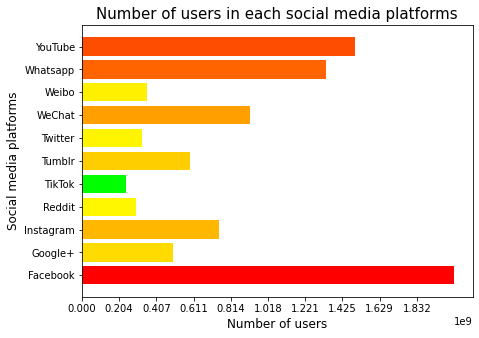

In [6]:
'''
config
'''
TITLE = "Number of users in each social media platforms"
X_LABEL = "Number of users"
Y_LABAL = "Social media platforms"
NUM_X_TICKS = 10

'''
plotting
'''
colors = [(0,1,0),(255,0,0)]
my_cmap = LinearSegmentedColormap.from_list('color_map', colors, N=100)

plt.figure(figsize=(7, 5))
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))    
plt.barh(social_media_platforms,num_users,color=my_cmap(rescale(num_users)))

plt.title(TITLE, fontsize=15)   
plt.xlabel(X_LABEL,fontsize=12)
plt.ylabel(Y_LABAL, fontsize=12)
plt.xticks(np.arange(5,max_num_users, max_num_users/NUM_X_TICKS))   # xticks create tick marks on x axis
plt.show()

# <span style = "color:blue">Question 2:</span>
Given the csv file LifeExpectancy.csv, write a program that will chart the life expectancy of three countries of your choice. Your plot should include the data from the year 1950 to the year 2019 (inclusive). The first few lines of code have been done for you.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
data = pd.read_csv('LifeExpectancy.csv')   # Create a dataframe from the csv file
data_1950_to_2019 = data.loc[(data["Year"] < 2021) & (1950 < data["Year"])] #1950 to 2021 data frame

In [8]:
countries = ["Brazil", "France", "Israel"]
countries_dataframes = []
for country in countries:
    countries_dataframes.append(data_1950_to_2019.loc[data_1950_to_2019.Entity == country])

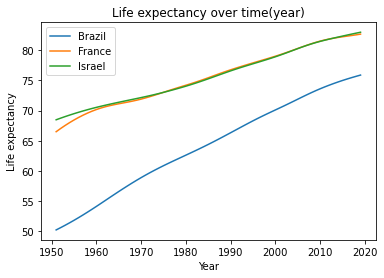

In [9]:
for country, country_df in zip(countries, countries_dataframes):
    x = country_df["Year"]
    y = country_df["Life expectancy"]
    plt.plot(x,y, label=country)
plt.title("Life expectancy over time(year)")
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.legend()
plt.show()